## Lab: LMS Algorithm (15 pts)
In this lab question, you will implement the LMS algorithm with NumPy to learn a linear regression model
for the provided dataset. You will also be directed to analyze how the choice of learning rate in the LMS
algorithm affect the final result. All the codes generating the results of this lab should be gathered in one
file and submit to Canvas.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

### Lab 1 (15 pts)
To start with, please download the dataset.mat file from Canvas and load it into NumPy arrays. There are two variables in the file: data $X ∈ \mathbb{R}^{100 \times 3}$ and target $D ∈ \mathbb{R}^{100 \times 1}$. Each individual pair of data and target is composed into $X$ and $D$ following the same way as discussed in Lecture 2. Specifically, each row in $X$ correspond to the transpose of a data point, with the first element as constant 1 and the other two as the two input features $x_{1k}$ and $x_{2k}$. The goal of the learning task is finding the weight vector $W ∈ \mathbb{R}^{3 \times 1}$ for the linear model that can minimize the MSE loss, which is also formulated on Lecture 2.

(a) (3pt) Directly compute the least square (Wiener) solution with the provided dataset. What is the optimal weight $W^*$? What is the MSE loss of the whole dataset when the weight is set to $W^*$?

In [2]:
# Find the dataset path
os.getcwd()

'/Users/suim/Downloads/24Fall/ECE 661 Computer Engineering Maching Learning and Deep Neural Nets/Homework Repos/Deep-Learning-HW-1'

In [3]:
# Load the data
file_path = "/Users/suim/Downloads/24Fall/ECE 661 Computer Engineering Maching Learning and Deep Neural Nets/Homework Repos/Deep-Learning-HW-1/dataset.mat"
data = loadmat(file_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'D', 'X'])


In [4]:
# Extract the data
D = data["D"]
X = data["X"]
D, X

(array([[ 1.19609949],
        [ 1.12330618],
        [ 4.88890248],
        [-1.90457744],
        [ 2.95003649],
        [ 2.91520292],
        [ 0.77401439],
        [-2.22224266],
        [-0.78980581],
        [ 3.49964557],
        [ 1.80639588],
        [ 3.48467111],
        [ 0.08950312],
        [ 0.06202087],
        [-1.02053461],
        [-1.27814349],
        [ 0.21759282],
        [ 1.30383408],
        [ 2.71451351],
        [ 3.51237178],
        [-1.11336876],
        [-0.24539694],
        [ 5.03814399],
        [ 3.92046371],
        [ 1.91598713],
        [ 1.85091514],
        [-2.02714752],
        [ 2.47751066],
        [ 6.25637317],
        [ 3.64925815],
        [ 0.40436223],
        [ 0.44099756],
        [ 1.33372972],
        [ 4.30636894],
        [-2.63919881],
        [-0.28348282],
        [ 0.38374143],
        [ 4.51384266],
        [-1.34447583],
        [-2.755337  ],
        [ 0.02062151],
        [ 1.40766025],
        [ 4.21394511],
        [-1

In [5]:
# Compute the least square (Wiener) solution
w_star = np.linalg.inv(X.T @ X) @ X.T @ D
print(w_star.flatten())

[ 1.0006781   1.00061145 -2.00031968]


In [6]:
# Compute the Loss
loss = np.mean((D - X @ w_star) ** 2)
print(loss)

0.00010079903131736677


(b) (4pt) Now consider that you can only train with 1 pair of data point and target each time. In such case, the LMS algorithm should be used to find the optimal weight. Please initialize the weight vector as $W^0 = [0, 0, 0]^T$, and update the weight with the LMS algorithm. After each $epoch$ (every time you go through all the training data and loop back to the beginning), compute and record the MSE loss of the current weight on the whole dataset. Run LMS for 20 epochs with learning rate $r = 0.005$, report the weight you get in the end and plot the MSE loss in $log$ $scale$ vs. Epochs.

In [7]:
# Initialize the weight matrix W
W = np.zeros((3, 1))  # shape (3, 1)

In [8]:
# Initialize the learning rate, epoch, and MSE list
learning_rate_first = 0.005
epochs = 20
mse_list = []

In [9]:
# Loop through each epoch and data point
for epoch in range(epochs):
    for i in range(X.shape[0]):  # Loop through each data point
        X_i = X[i].reshape(1, -1)  # shape (1, 3)
        D_i = D[i]  # scalar value

        # Prediction
        y_pred = np.dot(X_i, W)  # shape (1, 1)

        # Update weights using LMS
        W = W + learning_rate_first * (D_i - y_pred) * X_i.T  # shape (3, 1)

    # Calculate MSE for the entire dataset
    y_preds = np.dot(X, W)  # shape (100, 1)
    mse = np.mean((D - y_preds) ** 2)
    mse_list.append(mse)

In [10]:
# Report the final weights
W_final = W.flatten()
print("Final weights:", W_final)

Final weights: [ 1.00068274  1.0006024  -2.00033003]


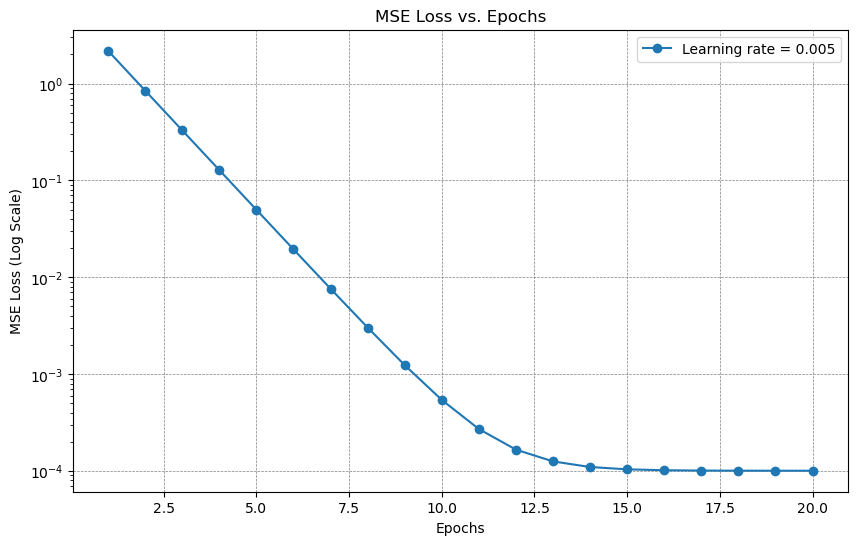

In [11]:
# plot the MSE loss in log scale vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), mse_list, marker="o")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss (Log Scale)")
plt.yscale("log")
plt.title("MSE Loss vs. Epochs")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.legend(["Learning rate = 0.005"])
plt.show()

(c) (3pt) Scatter plot the points ($x_{1k}$, $x_{2k}$, $d_{k}$) for all 100 data-target pairs in a 3D figure, and plot the lines corresponding to the linear models you got in (a) and (b) respectively in the same figure. Observe if the linear models fit the data well.

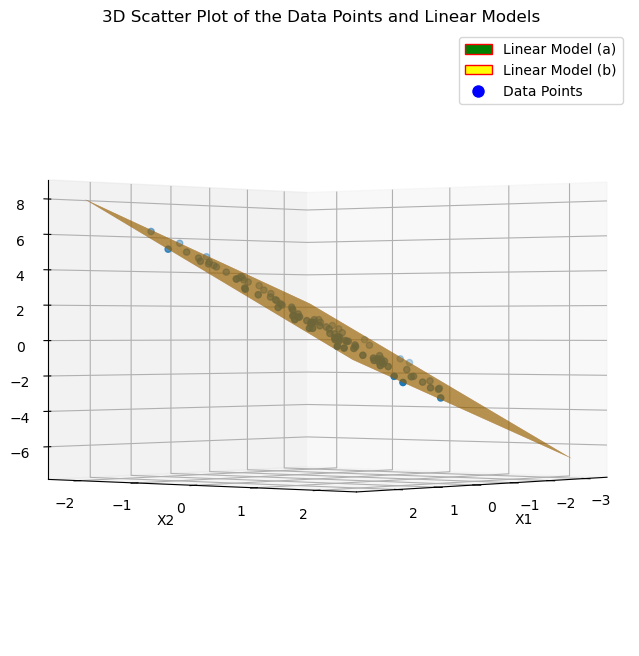

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")

ax.scatter(X[:, 1], X[:, 2], D, marker="o")

# Range for the decision boundary
x1_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x2_range = np.linspace(np.min(X[:, 2]), np.max(X[:, 2]), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Plot the Wiener solution
D_a = w_star[0] + w_star[1] * x1_grid + w_star[2] * x2_grid
ax.plot_surface(x1_grid, x2_grid, D_a, color="red", alpha=0.5, label="Linear Model (a)")

D_b = W[0] + W[1] * x1_grid + W[2] * x2_grid
ax.plot_surface(
    x1_grid, x2_grid, D_b, color="yellow", alpha=0.5, label="Linear Model (a)"
)

ax.set_title("3D Scatter Plot of the Data Points and Linear Models")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("D")
ax.view_init(elev=0, azim=40)

# Custom legend for the surfaces
legend_elements = [
    Patch(facecolor="green", edgecolor="r", label="Linear Model (a)"),
    Patch(facecolor="yellow", edgecolor="r", label="Linear Model (b)"),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="blue",
        markersize=10,
        label="Data Points",
    ),
]
ax.legend(handles=legend_elements)

plt.show()

(d) (5pt) Learning rate r is an important hyperparameter for the LMS algorithm, as well as for CNN optimization. Here, try repeat the process in (b) with $r$ set to 0.01, 0.05, 0.1 and 0.5 respectively. Together with the result you got in (b), plot the MSE losses of all sets of experiments in log scale vs. Epochs in one figure. Then try further enlarge the learning rate to $r = 1$ and observe how the
MSE changes. Base on these observations, comment on how learning rate affects the speed and quality of the learning process. (Note: The learning rate tuning for the CNN optimization will be introduced in Lecture 7.)

In [13]:
# Different learning rate (0.01, 0.05, 0.1, 0.5)
learning_rates = [0.01, 0.05, 0.1, 0.5]

# Initialize the weight matrix W
weights = [np.zeros((3, 1)) for _ in learning_rates]

# Initialize the MSE list
mse_lists = [[] for _ in learning_rates]

# Loop through each epoch and data point
for epoch in range(epochs):
    for i in range(X.shape[0]):  # Loop through each data point
        X_i = X[i].reshape(1, -1)  # shape (1, 3)
        D_i = D[i]  # scalar value

        # Update weights for each learning rate
        for j, learning_rate in enumerate(learning_rates):
            # Prediction
            y_pred = np.dot(X_i, weights[j])  # shape (1, 1)

            # Update weights using LMS
            weights[j] = (
                weights[j] + learning_rate * (D_i - y_pred) * X_i.T
            )  # shape (3, 1)

    # Calculate MSE for the entire dataset for each learning rate
    for j in range(len(learning_rates)):
        y_preds = np.dot(X, weights[j])  # shape (100, 1)
        mse = np.mean((D - y_preds) ** 2)
        mse_lists[j].append(mse)

# Report the final weights and MSE lists
W_1, W_2, W_3, W_4 = weights
mse_list_1, mse_list_2, mse_list_3, mse_list_4 = mse_lists

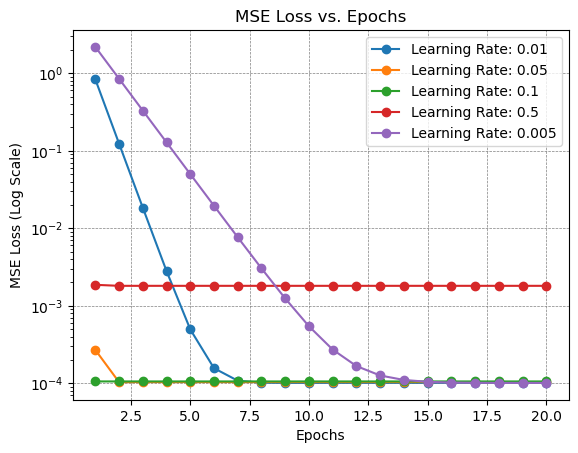

In [14]:
# Plot the MSE loss in log scale vs. Epochs
for i, learning_rate in enumerate(learning_rates):
    plt.plot(
        range(1, epochs + 1),
        mse_lists[i],
        label=f"Learning Rate: {learning_rate}",
        marker="o",
    )

plt.plot(
    range(1, epochs + 1),
    mse_list,
    label=f"Learning Rate: {learning_rate_first}",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss (Log Scale)")
plt.yscale("log")
plt.title("MSE Loss vs. Epochs")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

In [15]:
# Initialize the learning rate (1)
learning_rate_big = 1
mse_list_big = []
W = np.zeros((3, 1))

# Loop through each epoch and data point
for epoch in range(epochs):
    for i in range(X.shape[0]):  # Loop through each data point
        X_i = X[i].reshape(1, -1)  # shape (1, 3)
        D_i = D[i]  # scalar value

        # Prediction
        y_pred = np.dot(X_i, W)  # shape (1, 1)

        # Update weights using LMS
        W = W + learning_rate_big * (D_i - y_pred) * X_i.T  # shape (3, 1)

    # Calculate MSE for the entire dataset
    y_preds = np.dot(X, W)  # shape (100, 1)
    mse = np.mean((D - y_preds) ** 2)
    mse_list_big.append(mse)

/var/folders/6s/3xxfn9n94l76v9fzq_1cwkf80000gn/T/ipykernel_92865/4265597254.py:20: RuntimeWarning: overflow encountered in square
  mse = np.mean((D - y_preds) ** 2)


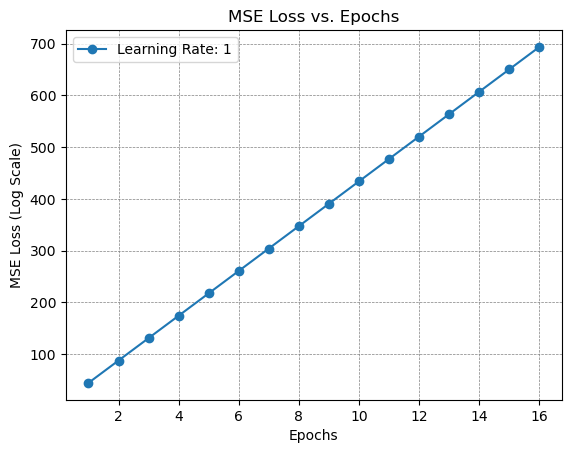

In [16]:
plt.plot(
    range(1, epochs + 1),
    np.log(mse_list_big),
    label=f"Learning Rate: {learning_rate_big}",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss (Log Scale)")
# plt.yscale("log")
plt.title("MSE Loss vs. Epochs")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()